In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

        GSPs GSPGroup                                           geometry
0       NETS       _N  MULTIPOLYGON (((243392.63 589698.709, 255939.4...
1       CHAP       _N  MULTIPOLYGON (((331236.338 565048.182, 331214....
2     BISW_1       _E  MULTIPOLYGON (((311775.048 281560.56, 311722.7...
3       PORD       _N  MULTIPOLYGON (((258665.362 665428.688, 258649....
4     BROR_P       _P  MULTIPOLYGON (((309710.615 919660.326, 309641....
..       ...      ...                                                ...
95    CITR_1       _C  MULTIPOLYGON (((530111.178 183348.146, 530148 ...
96    BRIM_1       _C  MULTIPOLYGON (((547386.593 190446.597, 547348....
97  BLYTH132       _F  MULTIPOLYGON (((414434.071 640669.426, 414290....
98     INDQ1       _L  MULTIPOLYGON (((212020.975 50266.911, 212007.0...
99      SASA       _D  MULTIPOLYGON (((298387.958 357188.398, 294269....

[100 rows x 3 columns]


<Axes: >

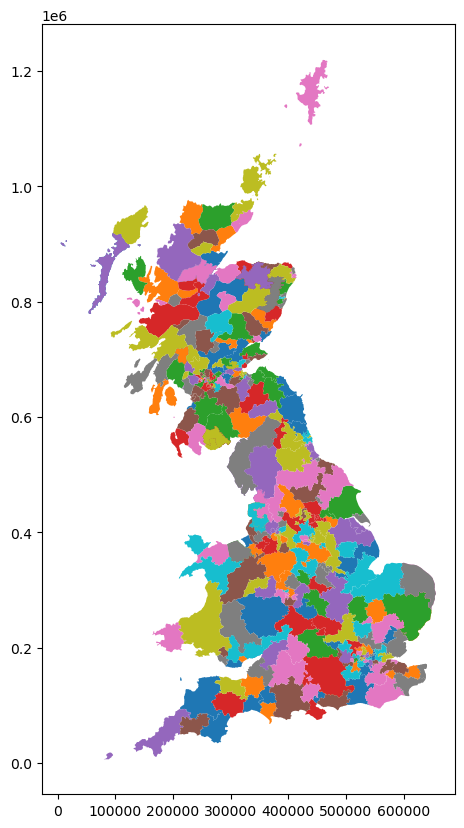

In [2]:
# import the shape files of the FLOPs and plot them

df_gsp = gpd.read_file("GSP_regions_27700_20250109.geojson")
print(df_gsp.head(100))

df_gsp_dissolved = df_gsp.dissolve(by="GSPs") # or by GSPGroup

fig,ax = plt.subplots(figsize=(20,10))
df_gsp_dissolved.plot(column=df_gsp_dissolved.index, legend=False, ax=ax)


# Although this produces a map, it is in terms of GSPGroups and not Major FLOPs. Combine with other data set,
# which maps GSPGroups to Major FLOPs, and plot that instead.


In [3]:
# import the demand data for the FLOPs and merge to get Major FLOPs

df_flop = pd.read_csv("FES_2025_demand.csv", skiprows = 17)
#print(df_flop.head())
print(len(df_flop))

# Merge the GeoDataFrame with the mean capacity factors DataFrame
df_merged = df_flop.merge(df_gsp, left_on="Elexon ID", right_on = "GSPs", how="left")
print(df_merged.head())


538
  Elexon ID             Name Minor FLOP Major FLOP  P(Gross)  Q Gross  Q net  \
0     ABHA1            Abham         F6          F     325.4      0.9  -20.9   
1    ABNE_P        Abernethy         T4          T      38.2     -0.7   -2.0   
2    ABTH_1         Aberthaw         H2          H     172.7      8.5  -32.9   
3    ACTL_2  Acton Lane 66kV         A7          A      24.5     -2.3   -2.8   
4    ACTL_C  Acton Lane 22kV         A7          A      33.8      0.4   -3.8   

   Embedded Storage  Embedded Solar  Embedded Wind  Embedded Hydro  \
0              80.0           248.1            1.0             1.9   
1               0.3            31.1           22.9             0.1   
2               0.7           112.8            0.6             0.0   
3               0.2             6.8            0.0             0.3   
4               0.0             0.7            0.0             0.0   

   Embedded Other  Dx Storage Demand  Micro storage Demand    GSPs GSPGroup  \
0            83

In [4]:
# Add the demand FLOPs together, then separately dissolve geometries by FLOP, then merge two dataframes

# Select which columns to keep
df_filtered = df_merged[["Major FLOP", "P(Gross)", "Q Gross", "Embedded Solar", "Embedded Wind", "Embedded Storage"]]
print(df_filtered.head(20))

# group all of the FLOPs that have the same Major FLOP together and sum the demand
df_grouped = df_filtered.groupby("Major FLOP").sum().reset_index()

print(df_grouped.head(20))

   Major FLOP  P(Gross)  Q Gross  Embedded Solar  Embedded Wind  \
0           F     325.4      0.9           248.1            1.0   
1           T      38.2     -0.7            31.1           22.9   
2           H     172.7      8.5           112.8            0.6   
3           A      24.5     -2.3             6.8            0.0   
4           A      33.8      0.4             0.7            0.0   
5           T      31.3     -1.7             6.7            6.4   
6           H       0.0      0.0             1.3            0.0   
7           F     262.2     19.3           421.5          176.7   
8           A      25.0     18.9           111.8            0.0   
9           T      21.8     -1.5            30.0            0.8   
10          T       0.0      0.0             1.0            0.0   
11          T      33.0     -6.3             8.9           43.3   
12          E      78.2      8.6             0.0            0.0   
13          E      80.5      7.1           219.3            0.

In [5]:
# Dissolve geometries by Major FLOP

# Select which columns to keep for the dissolve
df_filtered_geometry = df_merged[["Major FLOP", "geometry"]]
print(df_filtered_geometry.head(20))

# create a GeoDataFrame
gdf_filtered_geometry = gpd.GeoDataFrame(df_filtered_geometry, geometry="geometry")

# Dissolve geometries by Major FLOP
dissolved = gdf_filtered_geometry.dissolve(by="Major FLOP", aggfunc = "sum").reset_index()
print(dissolved.head(18))


   Major FLOP                                           geometry
0           F  MULTIPOLYGON (((300127.725 79687.548, 299459.2...
1           T  MULTIPOLYGON (((301732.526 695142.713, 301402 ...
2           H  MULTIPOLYGON (((322230 165160, 322400 165180, ...
3           A  MULTIPOLYGON (((513402.64 179723.834, 513305.8...
4           A  MULTIPOLYGON (((523834.573 182523.86, 523814.2...
5           T  MULTIPOLYGON (((273931.039 886100.918, 273920....
6           H  MULTIPOLYGON (((354474.988 188843.797, 353929....
7           F  MULTIPOLYGON (((212061.466 94143.068, 212217.6...
8           A  MULTIPOLYGON (((493472.077 207138.588, 493048....
9           T  MULTIPOLYGON (((365872.608 748762.403, 366110....
10          T  MULTIPOLYGON (((203333.965 710410.024, 203347....
11          T  MULTIPOLYGON (((123886.162 899272.979, 123832....
12          E  MULTIPOLYGON (((350404.641 120342.602, 350369....
13          E  MULTIPOLYGON (((350717.657 87291.935, 349061.9...
14          S  MULTIPOLYG

   Major FLOP                                           geometry
0           A  MULTIPOLYGON (((499272 142548, 499230 142600, ...
1           B  MULTIPOLYGON (((449470.92 102396.844, 449438.2...
2           C  MULTIPOLYGON (((532060.114 143491.058, 531951....
3           D  MULTIPOLYGON (((493191.034 206824.291, 493032....
4           E  MULTIPOLYGON (((347800.464 88920.721, 346449.7...
5           F  MULTIPOLYGON (((86209.974 11377.099, 86128.516...
6           G  MULTIPOLYGON (((365026.998 134319.801, 365025....
7           H  MULTIPOLYGON (((319884.02 172587.613, 319827.4...
8           J  MULTIPOLYGON (((567823.55 206262.51, 567801.87...
9           K  MULTIPOLYGON (((464051.666 344196.739, 464060....
10          L  MULTIPOLYGON (((340334.554 225744.235, 340318....
11          M  POLYGON ((340687.608 355801.863, 341127.779 35...
12          N  POLYGON ((381033.064 367588.176, 380430.219 36...
13          P  MULTIPOLYGON (((412213.425 383349.269, 411009....
14          Q  POLYGON ((

In [66]:
# Merge the new geometry with the demand based on Major FLOP
df_final = dissolved.merge(df_grouped, on="Major FLOP", how="left")
#print(df_final.head(20))

# print Q Gross and P(Gross) to check
print(df_final[['Major FLOP','Q Gross', 'P(Gross)']].head(20))


   Major FLOP  Q Gross  P(Gross)
0           A   1236.5    9811.2
1           B    292.2    3458.7
2           C    186.5    2118.5
3           D     37.7    2582.7
4           E     29.4    1241.8
5           F     61.8    1611.6
6           G    405.4    2889.3
7           H    305.8    2679.4
8           J    172.2    3858.2
9           K     51.6     577.1
10          L    783.1    8332.7
11          M     10.3     870.2
12          N    300.6    6219.6
13          P    270.4    6089.4
14          Q     52.4    3389.5
15          R     57.7    1204.1
16          S    362.1    3692.2
17          T    -29.5    1517.1


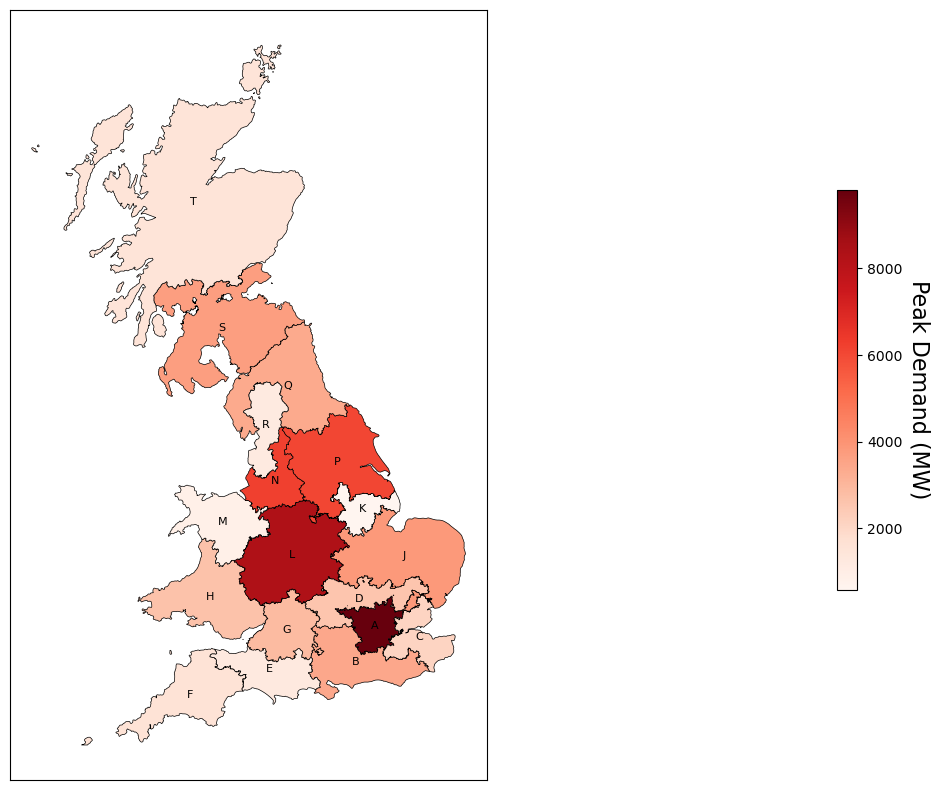

In [64]:
# plot a map of the FLOPS and demand (P(Gross) as color scale)
fig, ax = plt.subplots(figsize=(20,10))
# define colormap
df_final.plot(column="P(Gross)", legend=True,ax=ax, cmap='Reds', edgecolor="black", linewidth=0.5)

# ax = df_final.plot(column=dissolved.index, legend=True,figsize=(20,10), edgecolor="black", linewidth=0.5, label="Major FLOP")

# label each FLOP with its name
for x, y, label in zip(df_final.geometry.centroid.x, df_final.geometry.centroid.y, df_final["Major FLOP"]):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Remove axis ticks for a cleaner map look
ax.set_xticks([])
ax.set_yticks([])

# Label the colourbar "Peak Demand (GW)")
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel("Peak Demand (MW)", rotation=270, labelpad=20)
cbar.yaxis.label.set_size(16)

# make the coloubar half the length of the figure
cbar.set_position([0.92, 0.3, 0.02, 0.4])  # [left, bottom, width, height]

#plot(df_filtered_geometry)
#ax = dissolved.plot(column="Major FLOP", legend=True,figsize=(20,10), edgecolor="black", linewidth=0.5, label="Major FLOP")


     GSP ID GSP Group Minor FLOP             Name  Latitude  Longitude  \
3    ACTL_C        _C         A7  Acton Lane 22kV    51.535     -0.257   
130  FLEE_1        _H         B3            Fleet    51.250     -0.881   
179  KEMS_1        _J         C3          Kemsley    51.367      0.741   
305  SUND_1        _A         D4           Sundon    51.933     -0.502   
42    BRWA1        _L         E7      Bridgewater    51.117     -2.969   

     Comments                       geometry Major FLOP_chosen_for  \
3         NaN  POINT (520988.085 183227.707)                     A   
130       NaN  POINT (478193.695 150686.891)                     B   
179       NaN  POINT (590897.695 166669.579)                     C   
305       NaN  POINT (503087.304 227113.072)                     D   
42        NaN  POINT (332272.541 135748.539)                     E   

     dist_to_centroid_m  
3           3203.424031  
130        23968.077277  
179         4715.561832  
305         6485.493601  
42  

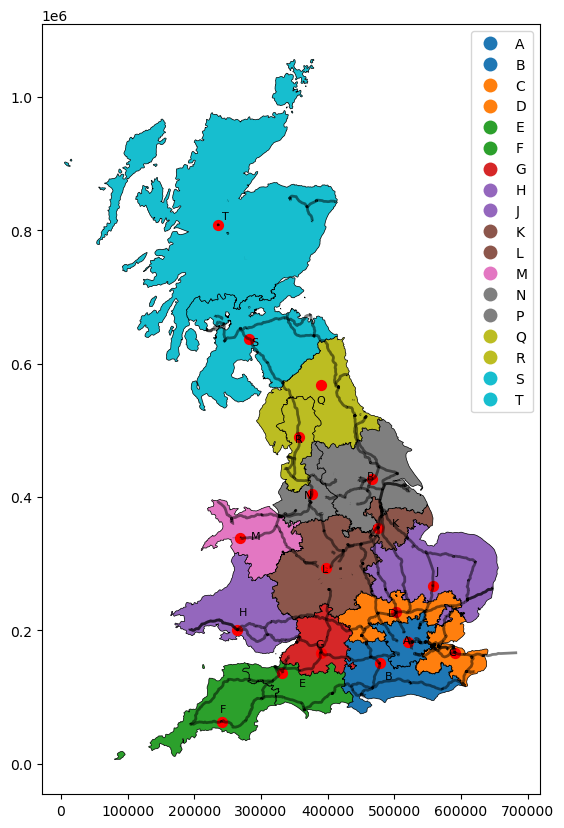

In [8]:
# plot a map of the demand by FLOP
ax = df_final.plot(column="Major FLOP", legend=True,figsize=(20,10), edgecolor="black", linewidth=0.5, label="Major FLOP")
# on the same plot, plot all of the substations in the following csv
df_substations = pd.read_csv("fes2024_regional_breakdown_gsp_info.csv")
#print(df_substations.head(20))

gdf_substations = gpd.GeoDataFrame(df_substations, geometry=gpd.points_from_xy(df_substations.Longitude, df_substations.Latitude), crs="EPSG:4326"
)
#print(gdf_substations["geometry"].head())

# Reproject substations into FLOP CRS
gdf_substations = gdf_substations.to_crs(df_final.crs)
#print(gdf_substations["geometry"].head())


# 4) Compute centroids (geometric centre) of FLOP polygons
# Use the true geometric centroid in the projected CRS
df_final["centroid_geom"] = df_final.geometry.centroid

# 5) Prepare spatial index on substations
subs_sindex = gdf_substations.sindex

# 6) For each FLOP, find nearest substation to centroid
chosen_rows = []
for idx, frow in df_final.iterrows():
    major = frow["Major FLOP"]
    centroid = frow["centroid_geom"]
    # use spatial index to get a small set of candidate nearest points (k nearest bounding-box hits)
    # request k=8 candidates; if dataset is small this is trivial
    try:
        candidate_idx = list(subs_sindex.nearest(centroid.bounds, 8))
    except Exception:
        # older rtree versions may not have nearest; fallback to all indices
        candidate_idx = list(gdf_substations.index)

    if len(candidate_idx) == 0:
        # no substations at all (edge-case)
        chosen = None
    else:
        # compute true distances to centroid for candidates and pick minimum
        candidates = gdf_substations.loc[candidate_idx].copy()
        # handle empty geometry possible
        candidates["dist_to_centroid"] = candidates.geometry.distance(centroid)
        minpos = candidates["dist_to_centroid"].idxmin()
        chosen = gdf_substations.loc[minpos].copy()
        chosen["Major FLOP_chosen_for"] = major
        chosen["dist_to_centroid_m"] = candidates.loc[minpos, "dist_to_centroid"]
    if chosen is not None:
        chosen_rows.append(chosen)

# Build GeoDataFrame of chosen substations
chosen_gdf = gpd.GeoDataFrame(chosen_rows, geometry="geometry", crs=gdf_substations.crs)
print(chosen_gdf.head())

#save as "chosen_substations_per_FLOP.geojson"
chosen_gdf.to_file("chosen_substations_per_FLOP.geojson", driver="GeoJSON")

# 7) Prepare output table and save
# select a few useful columns to output; include all original columns if you like
out_cols = ["Major FLOP_chosen_for", "geometry"]
# some files may use different column names for GSP ID/Name; keep what exists
available = [c for c in out_cols if c in chosen_gdf.columns]
output_df = chosen_gdf[available].copy()
output_df = output_df.rename(columns={"Major FLOP_chosen_for":"Major FLOP"})
print(output_df.head())

# save output to file
output_df.to_file("chosen_substations_per_FLOP.geojson", driver="GeoJSON")

# all substations small black points
#gdf_substations.plot(ax=ax, color="black", markersize=6, alpha=0.6, label="All substations")

# chosen substations as red stars
chosen_gdf.plot(ax=ax, color="red", markersize=50, marker="o", label="Chosen representative substation")

# plot all generation on the map too
df_generation = pd.read_csv("UK_2025_gen_above100MW_EPSG4326.csv")
#print(df_generation.head(20))

gdf_generation = gpd.GeoDataFrame(df_generation, geometry=gpd.points_from_xy(df_generation.lon, df_generation.lat), crs="EPSG:4326")
#print(gdf_generation["geometry"].head())

# Reproject generation into FLOP CRS
gdf_generation = gdf_generation.to_crs(df_final.crs)
#print(gdf_generation["geometry"].head())

# plot the points on the same map as the FLOPs
#gdf_generation.plot(ax=ax, color="green", markersize=7)

# plot all wires on the map
gdf_wires = gpd.read_file("overpass_turbo.geojson")
# convert to FLOP CRS
gdf_wires = gdf_wires.to_crs(df_final.crs)
# plot wires
gdf_wires.plot( ax=ax,color="black", linewidth=2, alpha=0.5, label="Wires")

# label each FLOP with its name
for x, y, label in zip(df_final.geometry.centroid.x, df_final.geometry.centroid.y, df_final["Major FLOP"]):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')



In [16]:
# Assigning generators to a FLOP


# Minimal, robust code to assign each generator point to a Major FLOP polygon.
# Requirements: geopandas, pandas, shapely
# Input:
#   generators_gdf : geopandas.GeoDataFrame with point geometries (or a CSV with lon/lat that you convert)
#   flops_gdf      : geopandas.GeoDataFrame with polygon geometries and a column containing the Major FLOP label
# Output:
#   generators_assigned_gdf : geopandas.GeoDataFrame with columns:
#       - Assigned_Major_FLOP  (string, from flops_gdf)
#       - Assigned_dist_m      (float, distance in CRS units; 0.0 if point was inside polygon)
#
# Example usage:
#   gen = gpd.read_file("generators.geojson")        # or build from CSV
#   flops = gpd.read_file("GSP_regions_with_major.geojson")
#   assigned = assign_generators_to_flop(gen, flops, flop_major_col="Major_used")
#   assigned.to_file("generators_assigned.geojson", driver="GeoJSON")


def assign_generators_to_flop(generators_gdf, flops_gdf, flop_major_col="Major_used"):
    """
    Assign each generator point to a Major FLOP polygon.
    - First tries point-in-polygon (within).
    - For points not inside any polygon, assigns the nearest FLOP polygon (by geometric distance).
    Returns a copy of generators_gdf with two new columns:
      'Assigned_Major_FLOP' and 'Assigned_dist_m' (distance; 0.0 if inside polygon).
    Notes:
      - Both inputs must be GeoDataFrames with valid geometry column.
      - If generators_gdf CRS differs from flops_gdf and allow_reproject is True, the generator
        GeoDataFrame will be reprojected to flops_gdf.crs for spatial ops.
    """
    # basic checks
    if flop_major_col not in flops_gdf.columns:
        raise ValueError(f"flops_gdf must contain column '{flop_major_col}' with Major FLOP labels.")
    if not isinstance(generators_gdf, gpd.GeoDataFrame) or not isinstance(flops_gdf, gpd.GeoDataFrame):
        raise ValueError("Both inputs must be GeoDataFrames.")

    # copy inputs to avoid mutating original
    gens = generators_gdf.copy()
    flops = flops_gdf.copy()

    # Prepare output columns
    gens["Assigned_Major_FLOP"] = None
    gens["Assigned_dist_m"] = np.nan

    # 1) spatial join: point inside polygon (within)
    # Use predicate='within' to ensure strict containment (points on boundary may be handled; you can use 'intersects' if preferred)
    try:
        contains = gpd.sjoin(gens, flops[[flop_major_col, "geometry"]], how="left", predicate="within")
    except TypeError:
        # older geopandas versions used 'op' instead of 'predicate'
        contains = gpd.sjoin(gens, flops[[flop_major_col, "geometry"]], how="left", op="within")

    # 'contains' has column named flop_major_col from flops
    gens.loc[contains.index, "Assigned_Major_FLOP"] = contains[flop_major_col].values
    # Distance 0 for those within
    gens.loc[contains.index, "Assigned_dist_m"] = 0.0

    # 2) handle unmatched points (Assigned_Major_FLOP is null)
    unmatched_mask = gens["Assigned_Major_FLOP"].isna()
    if unmatched_mask.any():
        unmatched = gens[unmatched_mask].copy()

        # Prefer geopandas.sjoin_nearest if available (fast, returns closest polygon)
        try:
            nearest = gpd.sjoin_nearest(unmatched, flops[[flop_major_col, "geometry"]], how="left", distance_col="dist_to_flop")
            # Write back results for those unmatched indices
            gens.loc[nearest.index, "Assigned_Major_FLOP"] = nearest[flop_major_col].values
            gens.loc[nearest.index, "Assigned_dist_m"] = nearest["dist_to_flop"].values
        except Exception:
            # Fallback: spatial-index-based manual nearest search (slower)
            # Build spatial index of flops using representative geometry (use polygon centroid for distance calc)
            flops["__rep_point"] = flops.geometry.centroid
            flops_sindex = flops.sindex
            for idx, prow in unmatched.iterrows():
                # query possible nearest polygons (k nearest via bounding box expand)
                possible_idx = list(flops_sindex.nearest(prow.geometry.bounds, num_results=5)) if hasattr(flops_sindex, "nearest") else list(flops_sindex.intersection(prow.geometry.bounds))
                if not possible_idx:
                    # if nothing returned, consider all (slow)
                    distances = flops["__rep_point"].distance(prow.geometry)
                    imin = distances.idxmin()
                else:
                    # compute actual distances to centroid for candidates
                    cand = flops.iloc[possible_idx]
                    distances = cand["__rep_point"].distance(prow.geometry)
                    imin = distances.idxmin()
                assigned_major = flops.at[imin, flop_major_col]
                assigned_dist = flops.at[imin, "__rep_point"].distance(prow.geometry)
                gens.at[idx, "Assigned_Major_FLOP"] = assigned_major
                gens.at[idx, "Assigned_dist_m"] = assigned_dist

            # drop helper column
            flops.drop(columns="__rep_point", inplace=True, errors=True)

    # final: return gens in original input order/CRS? We keep the CRS of flops (so distances are meaningful)
    return gens

# ----------------------------
# Minimal example usage (uncomment / adapt to your file paths)
# ----------------------------
# import geopandas as gpd
# gens = gpd.read_file("generators_points.geojson")            # or build from CSV: gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs=4326)
# flops = gpd.read_file("GSP_regions_27700_20250109_split_with_major.geojson")
# assigned = assign_generators_to_flop(gens, flops, flop_major_col="Major_used")
# assigned.to_file("generators_assigned.geojson", driver="GeoJSON")
# assigned.drop(columns="geometry").to_csv("generators_assigned.csv", index=False)

generation = assign_generators_to_flop(gdf_generation, df_final, flop_major_col="Major FLOP")

# show all solar generation assigned to FLOPs
print(generation.head())

   id  Name Fueltype      Technology  Capacity (MW)      lat     lon  \
0  37  Sloy    Hydro    Run-Of-River          153.0  56.2615 -4.7636   
1  38  Foye    Hydro    Run-Of-River          320.0  57.2558 -4.4941   
2  39  Ffes    Hydro    Run-Of-River          384.0  52.9808 -3.9686   
3  40  Dino    Hydro    Run-Of-River         1728.0  53.1206 -4.1153   
4  41  Crua    Hydro  Pumped Storage          440.0  56.4192 -5.0127   

                        geometry Assigned_Major_FLOP  Assigned_dist_m  
0  POINT (228923.845 711102.499)                   T              0.0  
1   POINT (249643.853 821104.04)                   T              0.0  
2   POINT (267928.79 344418.088)                   M              0.0  
3  POINT (258539.759 360247.612)                   M              0.0  
4  POINT (214268.534 729293.732)                   T              0.0  


In [ ]:
# the new demand profile for each FLOP will now be df_final - generation at each FLOP
# sum the generation by Major FLOP
generation_sum = generation.groupby("Assigned_Major_FLOP")["Capacity (MW)"].sum()
print(generation_sum.head(18))
#sum all generation to check it is reasonable
total_generation = generation_sum.sum()
#print(f"Total Generation across all FLOPs: {total_generation} MW")

df_final_demand = df_final
# subtract generation from demand at each FLOP
df_final_demand.set_index("Major FLOP", inplace=True)
df_final_demand["Net_Demand_MW"] = df_final_demand["P(Gross)"] - generation_sum
df_final_demand.reset_index(inplace=True)
print(df_final_demand[['Major FLOP','Net_Demand_MW']].head(18))

#sum demand 
total_demand = df_final_demand["P(Gross)"].sum()
#print(f"Total Demand across all FLOPs: {total_demand} MW")

#sum net demand to check it is reasonable
total_net_demand = df_final_demand["Net_Demand_MW"].sum()
#print(f"Total Net Demand across all FLOPs: {total_net_demand} MW")

   Major FLOP  Net_Demand_MW
0           A         8544.2
1           B         1593.7
2           C        -3319.8
3           D         1092.7
4           E        -4042.2
5           F          566.6
6           G         1631.3
7           H        -1789.6
8           J        -8464.6
9           K        -4116.9
10          L         8096.7
11          M        -3832.8
12          N         4110.6
13          P        -3390.6
14          Q        -2584.5
15          R        -1471.9
16          S        -2462.2
17          T        -5052.3


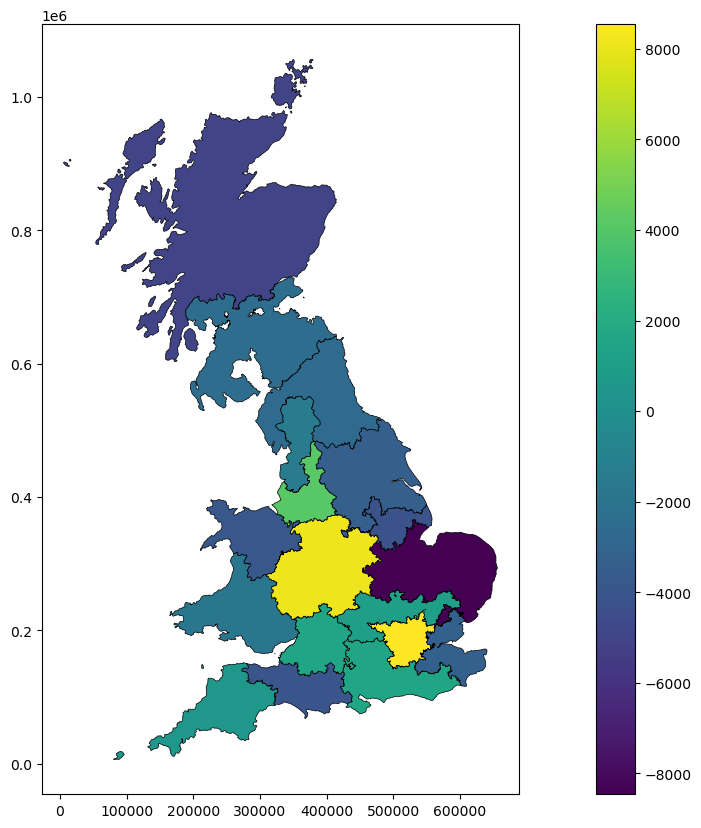

In [11]:
# plot the net demand by FLOP
ax = df_final_demand.plot(column="Net_Demand_MW", legend=True,figsize=(20,10), edgecolor="black", linewidth=0.5, label="Major FLOP Net Demand (MW)")

In [12]:
# the renewable generation for each FLOP

# calcuate the wind generated in each FLOP
wind_generation = generation[generation["Fueltype"] == "Wind"]
#print(wind_generation.head(20)) 

# sum by FLOP and keep column title
wind_generation_sum = wind_generation.groupby("Assigned_Major_FLOP")["Capacity (MW)"].sum().reset_index(name="Capacity (MW)")

print(wind_generation_sum.head(20))

# calcuate the solar generated in each FLOP
solar_generation = generation[generation["Fueltype"] == "Solar"]
#print(solar_generation.head(20)) 

# sum by FLOP
solar_generation_sum = solar_generation.groupby("Assigned_Major_FLOP")["Capacity (MW)"].sum()
print(solar_generation_sum.head(20))

# add 378.3 to FLOP C in wind to combine solar and wind
wind_generation_sum.loc[wind_generation_sum["Assigned_Major_FLOP"] == "C", "Capacity (MW)"] += 378.3
renewable_gen = wind_generation_sum
print(renewable_gen)


   Assigned_Major_FLOP  Capacity (MW)
0                    B          400.0
1                    C         1070.0
2                    H          228.0
3                    J         6959.8
4                    K         1061.0
5                    M          576.0
6                    N          254.0
7                    P         1300.0
8                    Q         5165.2
9                    S         3776.4
10                   T         4003.4
Assigned_Major_FLOP
C    378.3
Name: Capacity (MW), dtype: float64
   Assigned_Major_FLOP  Capacity (MW)
0                    B          400.0
1                    C         1448.3
2                    H          228.0
3                    J         6959.8
4                    K         1061.0
5                    M          576.0
6                    N          254.0
7                    P         1300.0
8                    Q         5165.2
9                    S         3776.4
10                   T         4003.4


In [37]:
# Embedded Solar Generation by FLOP
#print(df_grouped)
#print(renewable_gen)

# combine embedded solar, embedded wind and 
renewables = df_grouped.merge(renewable_gen, left_on="Major FLOP", right_on = "Assigned_Major_FLOP", how="left")
print(renewables.head(20))

# sum all renewable generation excluding NaN entries
renewables["Total_Renewable_Generation_MW"] = renewables["Capacity (MW)"].fillna(0) + renewables["Embedded Solar"].fillna(0) + renewables["Embedded Wind"].fillna(0) + renewables["Embedded Storage"].fillna(0)
print(renewables[['Major FLOP','Q Gross', 'P(Gross)','Total_Renewable_Generation_MW']].head(20))

# save renewables to csv
# renewables.to_csv("FLOP_power_generation_2025.csv", index=False)

   Major FLOP  P(Gross)  Q Gross  Embedded Solar  Embedded Wind  \
0           A    9811.2   1236.5           675.6            1.0   
1           B    3458.7    292.2          1364.0           78.2   
2           C    2118.5    186.5          1096.9          258.1   
3           D    2582.7     37.7          1276.9           31.7   
4           E    1241.8     29.4          1256.7            3.9   
5           F    1611.6     61.8          1611.8          316.4   
6           G    2889.3    405.4          2660.2           63.5   
7           H    2679.4    305.8          1784.6          845.5   
8           J    3858.2    172.2          3391.3          759.5   
9           K     577.1     51.6           922.0          237.3   
10          L    8332.7    783.1          2975.2          238.5   
11          M     870.2     10.3           513.2          803.9   
12          N    6219.6    300.6           776.9          250.1   
13          P    6089.4    270.4          1611.6          748.

In [50]:
# merge generation and df_grouped
total_gen = df_grouped.merge(generation_sum, left_on="Major FLOP", right_on = "Assigned_Major_FLOP", how="left")
#print(total_gen.head(20))

# add solar, wind, storage and capacity together  for total generation at each FLOP
total_gen["Total_Generation_MW"] = total_gen["Capacity (MW)"].fillna(0) + total_gen["Embedded Solar"].fillna(0) + total_gen["Embedded Wind"].fillna(0) + total_gen["Embedded Storage"].fillna(0)

total_gen = total_gen[['Major FLOP','Total_Generation_MW']]
#print(total_gen.head(20))

# merge with df_final to get geometry
gen_geo = df_final.merge(total_gen, on="Major FLOP", how="left")
print(gen_geo[['Major FLOP', 'geometry', 'Total_Generation_MW']].head(20))


   Major FLOP                                           geometry  \
0           A  MULTIPOLYGON (((499272 142548, 499230 142600, ...   
1           B  MULTIPOLYGON (((449470.92 102396.844, 449438.2...   
2           C  MULTIPOLYGON (((532060.114 143491.058, 531951....   
3           D  MULTIPOLYGON (((493191.034 206824.291, 493032....   
4           E  MULTIPOLYGON (((347800.464 88920.721, 346449.7...   
5           F  MULTIPOLYGON (((86209.974 11377.099, 86128.516...   
6           G  MULTIPOLYGON (((365026.998 134319.801, 365025....   
7           H  MULTIPOLYGON (((319884.02 172587.613, 319827.4...   
8           J  MULTIPOLYGON (((567823.55 206262.51, 567801.87...   
9           K  MULTIPOLYGON (((464051.666 344196.739, 464060....   
10          L  MULTIPOLYGON (((340334.554 225744.235, 340318....   
11          M  POLYGON ((340687.608 355801.863, 341127.779 35...   
12          N  POLYGON ((381033.064 367588.176, 380430.219 36...   
13          P  MULTIPOLYGON (((412213.425 383349

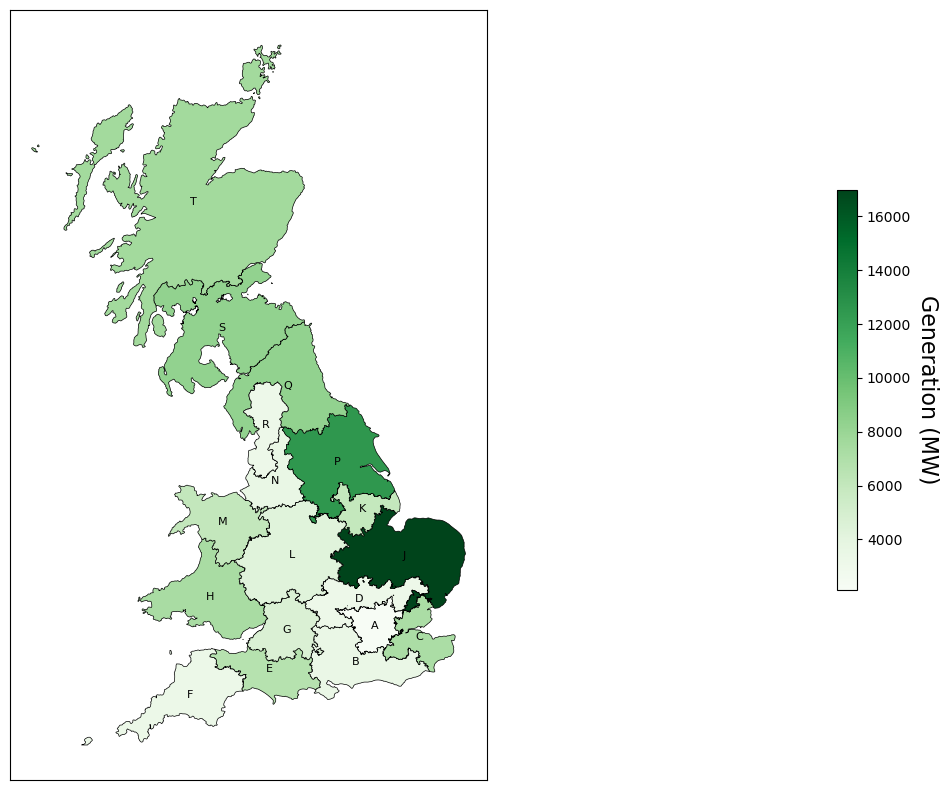

In [63]:
# plot the total generation by FLOP and make cbar smaller
# define colormap
ax = gen_geo.plot(column="Total_Generation_MW", legend=True,figsize=(20,10), cmap = 'Greens', edgecolor="black", linewidth=0.5, label="Major FLOP Total Generation (MW)")

# label each FLOP with its name
for x, y, label in zip(df_final.geometry.centroid.x, df_final.geometry.centroid.y, df_final["Major FLOP"]):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Remove axis ticks for a cleaner map look
ax.set_xticks([])
ax.set_yticks([])

# Label the colourbar "Peak Demand (GW)") with font size increased
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel("Generation (MW)", rotation=270, labelpad=20)
cbar.yaxis.label.set_size(16)

# make the coloubar half the length of the figure
cbar.set_position([0.92, 0.3, 0.02, 0.4])  # [left, bottom, width, height]

In [14]:
# the renewables variable shows generation against demand. What now?

# sum P(Gross) - Total_Renewable_Generation_MW
net_demand = renewables["P(Gross)"].sum() - renewables["Total_Renewable_Generation_MW"].sum()
print(net_demand)

# This shows that peak renewable generation is 680 MW greater than peak demand
# Therefore, I don't need to account for nuclear like I did below.








# I still need to add 5186 MW of generation to meet the demand at peak demand
# Firstly, I will get this from nuclear

# calcuate the nuclear generated in each FLOP
#nuclear_generation = generation[generation["Fueltype"] == "Nuclear"]
#print(nuclear_generation.head(20)) 

# sum by FLOP and keep column title
#nuclear_generation_sum = nuclear_generation.groupby("Assigned_Major_FLOP")["Capacity (MW)"].sum().reset_index(name="Capacity (MW)")

#print(nuclear_generation_sum.head(20))


# we can see that the nuclear generation in FLOP E will meet demand that renewables cannot meet
# now add nuclear to the generation of FLOP E only
#renewables.loc[renewables["Major FLOP"] == "E", "Total_Renewable_Generation_MW"] += 5186

power_generation = renewables

#print(power_generation[['Major FLOP','P(Gross)','Total_Renewable_Generation_MW']].head(20))

# calculate net power flow for each FLOP

power_generation.set_index("Major FLOP", inplace=True)
power_generation["Net_Demand_MW"] = power_generation["P(Gross)"] - power_generation["Total_Renewable_Generation_MW"]
power_generation.reset_index(inplace=True)
print(power_generation[['Major FLOP','Net_Demand_MW']].head(18))

# save power_generation to csv
# power_generation.to_csv("FLOP_power_generation_2025.csv", index=False)


# this shows that there are 10 generaotr FLOPS

-679.8999999999942
   Major FLOP  Net_Demand_MW
0           A         8955.4
1           B         1448.6
2           C        -1115.4
3           D          882.1
4           E         -132.7
5           F         -596.4
6           G         -541.8
7           H         -372.1
8           J        -7759.8
9           K        -1796.6
10          L         4297.1
11          M        -1028.0
12          N         4497.0
13          P         1720.4
14          Q        -4088.2
15          R          688.3
16          S        -2222.3
17          T        -3515.5
